Activity 1: Data Loading and Exploration
Initializing the analysis by loading and exploring the dataset, ensuring data integrity and
format consistency for accurate downstream analysis.
1. Load the COVID-19 DataFrame using pandas from the provided dataset files.
2. Display the first 5 and last 5 rows of the DataFrame.
3. Check for missing values in the dataset and decide on a strategy to handle them.
4. Remove the columns with more than 90% of missing values.
5. Convert the 'date' column to the datetime data type

In [ ]:
import pandas as pd

# Load the COVID-19 dataset
# Assuming the dataset is in CSV format, adjust the file path accordingly
covid_df = pd.read_csv("/content/owid-covid-data.csv")

# Display the first 5 rows in a table format
print(covid_df.head().to_markdown(index=False))

# Display the last 5 rows in a table format
print(covid_df.tail().to_markdown(index=False))

# Check for missing values
print(covid_df.isnull().sum())

# Remove columns with more than 90% missing values
threshold = 0.9 * len(covid_df)
covid_df.dropna(thresh=threshold, axis=1, inplace=True)

# Convert the 'date' column to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

print(covid_df.head())

| iso_code   | continent   | location    | date       |   total_cases |   new_cases |   new_cases_smoothed |   total_deaths |   new_deaths |   new_deaths_smoothed |   total_cases_per_million |   new_cases_per_million |   new_cases_smoothed_per_million |   total_deaths_per_million |   new_deaths_per_million |   new_deaths_smoothed_per_million |   reproduction_rate |   icu_patients |   icu_patients_per_million |   hosp_patients |   hosp_patients_per_million |   weekly_icu_admissions |   weekly_icu_admissions_per_million |   weekly_hosp_admissions |   weekly_hosp_admissions_per_million |   total_tests |   new_tests |   total_tests_per_thousand |   new_tests_per_thousand |   new_tests_smoothed |   new_tests_smoothed_per_thousand |   positive_rate |   tests_per_case |   tests_units |   total_vaccinations |   people_vaccinated |   people_fully_vaccinated |   total_boosters |   new_vaccinations |   new_vaccinations_smoothed |   total_vaccinations_per_hundred |   people_vaccinated_per_hundred 


 Activity 2: Data Cleaning and Feature Engineering
Enhancing data relevance and structure, enabling focused analysis on key COVID-19
indicators and demographic factors.
1. Impute missing values in the dataset columns
2. Remove duplicate rows from the DataFrame.
3. Create new features if needed (e.g., extract year and month from the 'date' column).
4. Explore unique countries in the dataset and count the total number of countries.

In [ ]:
import pandas as pd

# Load the COVID-19 dataset
# Assuming the dataset is in CSV format, adjust the file path accordingly
covid_df = pd.read_csv("/content/owid-covid-data.csv")

# Display the first 5 rows in a table format
print(covid_df.head().to_markdown(index=False))

# Display the last 5 rows in a table format
print(covid_df.tail().to_markdown(index=False))

# Check for missing values
print(covid_df.isnull().sum())

# Remove columns with more than 90% missing values
threshold = 0.9 * len(covid_df)
covid_df.dropna(thresh=threshold, axis=1, inplace=True)

# Convert the 'date' column to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

print(covid_df.head())

# Impute missing values (e.g., with mean or median)
numeric_cols = covid_df.select_dtypes(include=['number']).columns
covid_df[numeric_cols] = covid_df[numeric_cols].fillna(covid_df[numeric_cols].mean())

# Remove duplicate rows
covid_df.drop_duplicates(inplace=True)

# Create new features (e.g., year and month)
covid_df['year'] = covid_df['date'].dt.year
covid_df['month'] = covid_df['date'].dt.month

# Explore unique countries
unique_countries = covid_df['location'].unique()
print("Unique Countries:", unique_countries)
print("Total Number of Countries:", len(unique_countries))


| iso_code   | continent   | location    | date       |   total_cases |   new_cases |   new_cases_smoothed |   total_deaths |   new_deaths |   new_deaths_smoothed |   total_cases_per_million |   new_cases_per_million |   new_cases_smoothed_per_million |   total_deaths_per_million |   new_deaths_per_million |   new_deaths_smoothed_per_million |   reproduction_rate |   icu_patients |   icu_patients_per_million |   hosp_patients |   hosp_patients_per_million |   weekly_icu_admissions |   weekly_icu_admissions_per_million |   weekly_hosp_admissions |   weekly_hosp_admissions_per_million |   total_tests |   new_tests |   total_tests_per_thousand |   new_tests_per_thousand |   new_tests_smoothed |   new_tests_smoothed_per_thousand |   positive_rate |   tests_per_case |   tests_units |   total_vaccinations |   people_vaccinated |   people_fully_vaccinated |   total_boosters |   new_vaccinations |   new_vaccinations_smoothed |   total_vaccinations_per_hundred |   people_vaccinated_per_hundred 

Activity 3: Worldwide COVID-19 Overview
Providing a global and temporal perspective on COVID-19, identifying patterns and
correlations crucial for strategic decision-making.
1. Visualize the WHO Regions with total COVID-19 cases and total deaths by using bar plots.
2. Explore the world wide monthly trend of COVID-19 cases using a line plot.
3. Investigate the correlation between total cases and total deaths using a heatmap..
4. Analyze how total cases have evolved over time for a specific location (e.g., India).

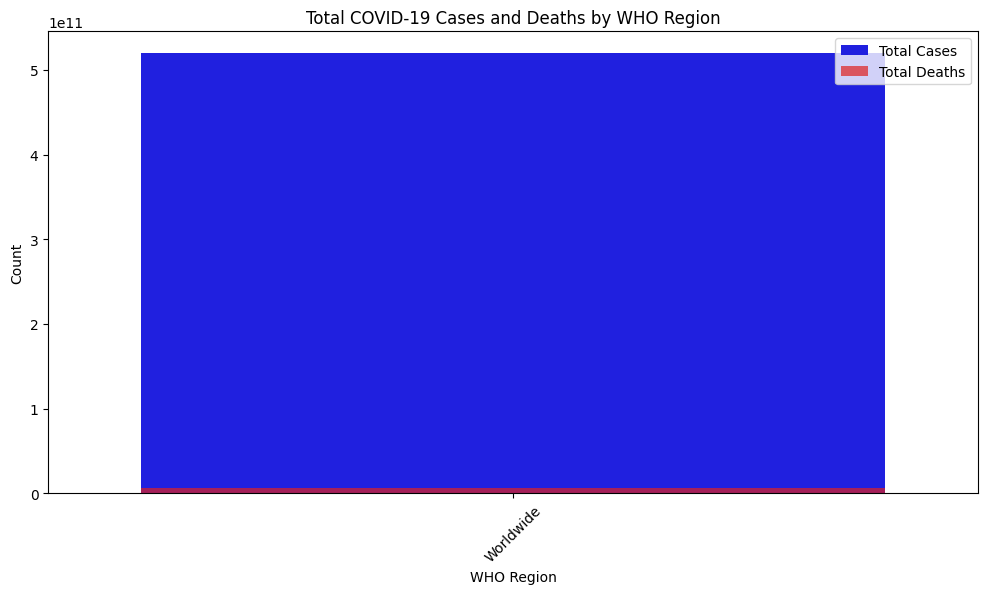

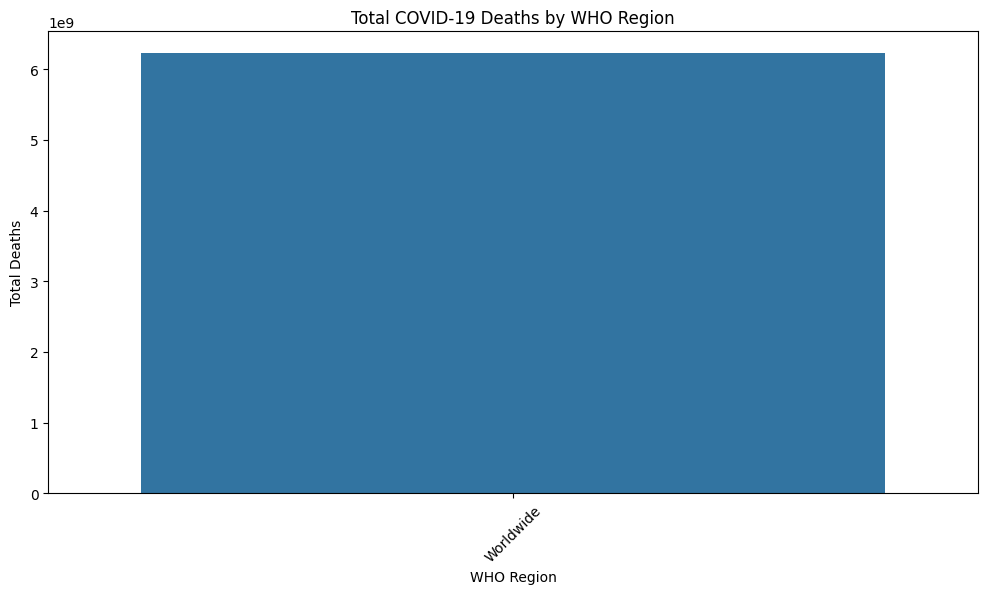

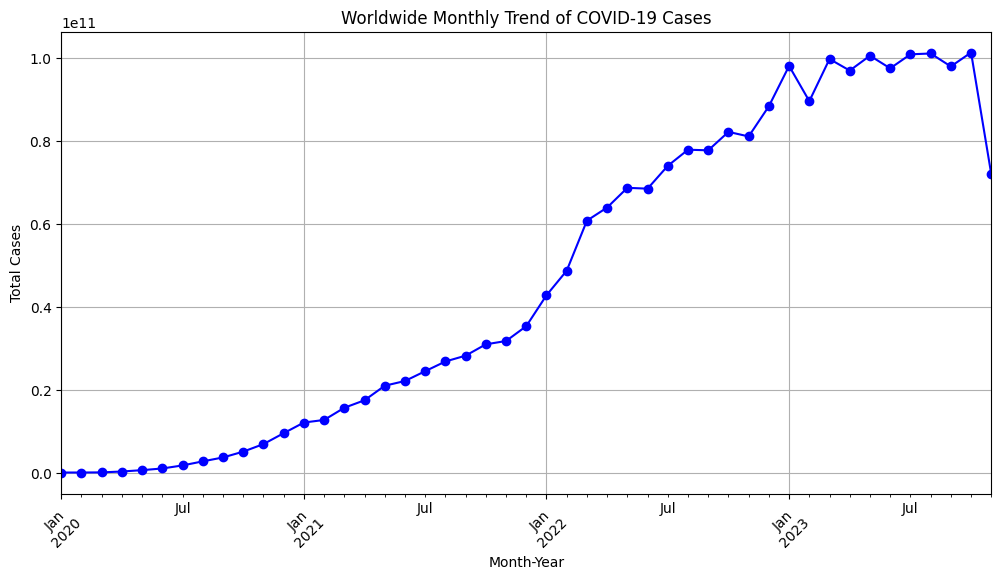

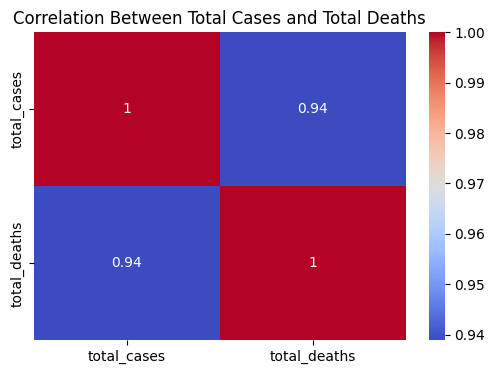

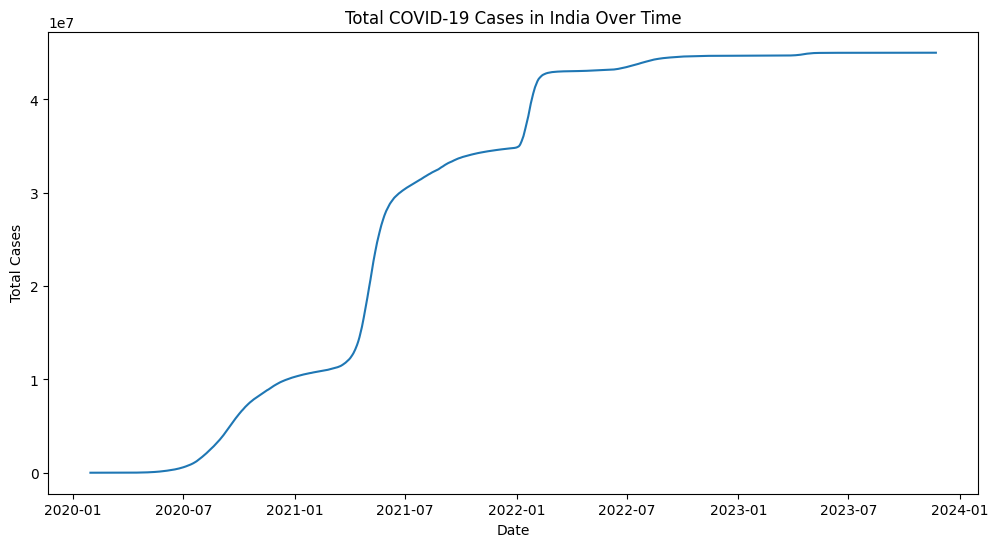

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the COVID-19 dataset
# Assuming the dataset is in CSV format, adjust the file path accordingly
covid_df = pd.read_csv("/content/owid-covid-data.csv")



# Visualize COVID-19 cases and deaths by World

# Example WHO Region mapping for ISO codes
iso_to_who = {
    'OWID_WRL': 'Worldwide' # Global data
    # Add other mappings for relevant ISO codes...
}

# Add a WHO Region column using the mapping
covid_df['WHO Region'] = covid_df['iso_code'].map(iso_to_who)

# Plotting the data
who_regions = covid_df.groupby('WHO Region')[['total_cases', 'total_deaths']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='total_cases', data=who_regions, color='blue', label='Total Cases')
sns.barplot(x='WHO Region', y='total_deaths', data=who_regions, color='red', label='Total Deaths', alpha=0.7)
plt.title('Total COVID-19 Cases and Deaths by WHO Region')
plt.ylabel('Count')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='total_deaths', data=who_regions)
plt.title('Total COVID-19 Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

# Explore the world wide monthly trend of COVID-19 cases

# Convert 'date' column to datetime format (if needed)
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Group by month and year and calculate total cases
covid_df['month_year'] = covid_df['date'].dt.to_period('M')
monthly_trend = covid_df.groupby('month_year')['total_cases'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='blue')
plt.title('Worldwide Monthly Trend of COVID-19 Cases')
plt.xlabel('Month-Year')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Investigate the correlation between total cases and total deaths
correlation_matrix = covid_df[['total_cases', 'total_deaths']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Total Cases and Total Deaths')
plt.show()

# Analyze total cases over time for India
india_df = covid_df[covid_df['location'] == 'India']
plt.figure(figsize=(12, 6))
plt.plot(india_df['date'], india_df['total_cases'])
plt.title('Total COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

Activity 4: Regional Analysis
Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case
distribution and fatality across time and continents.
1. Create a grouped bar chart to visualize new cases by continent and month.
2. Visualize the distribution of total COVID-19 cases by year using a box plot.
3. Compare total deaths across different continents using a bar plot.
4. Analyze the total cases on a month-by-month basis using a bar plot.

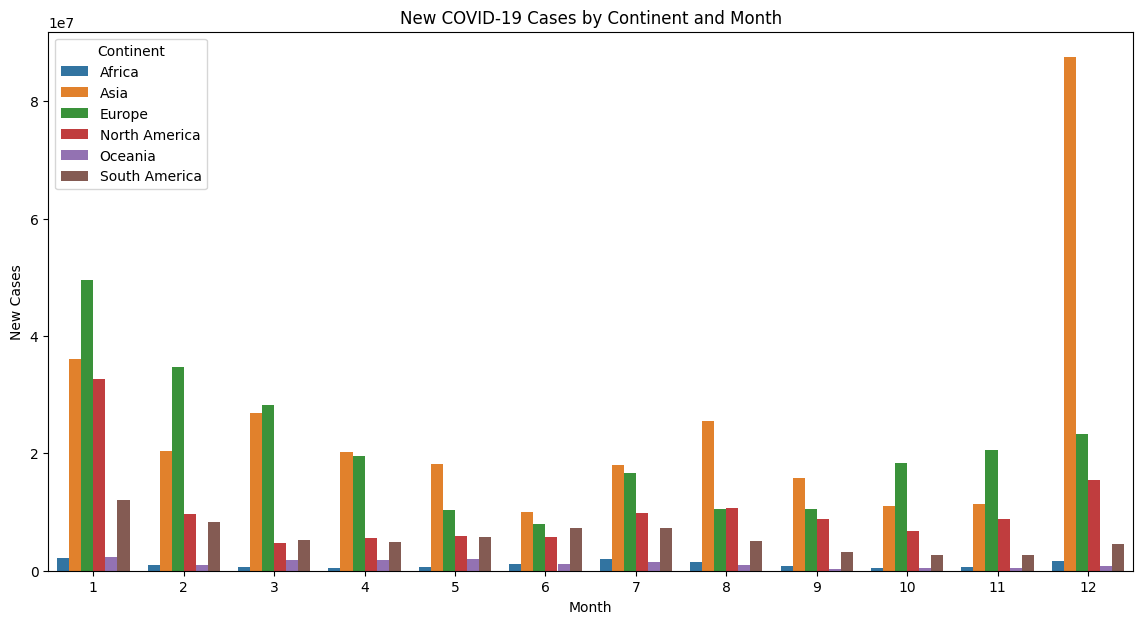

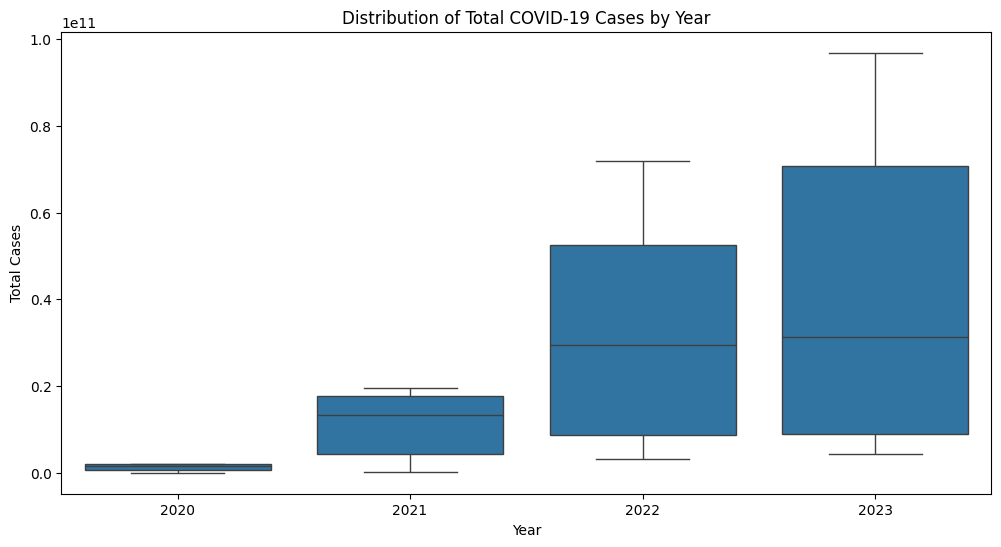

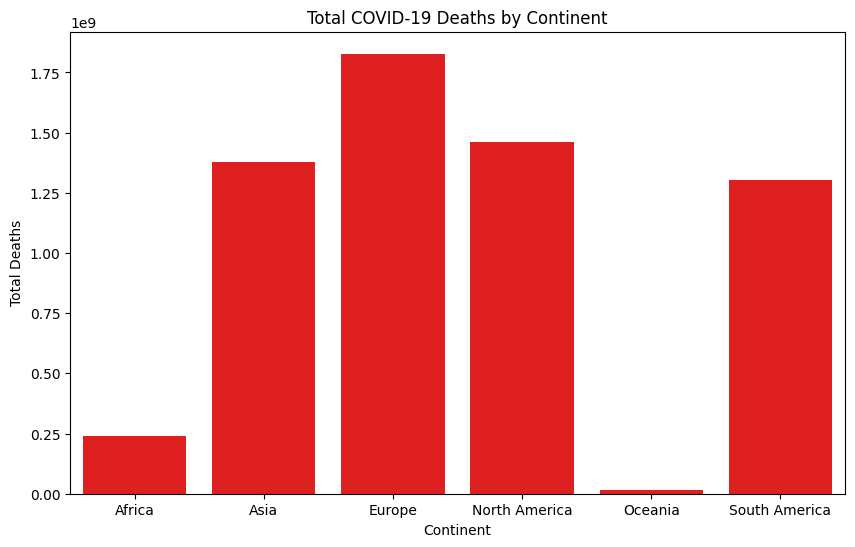

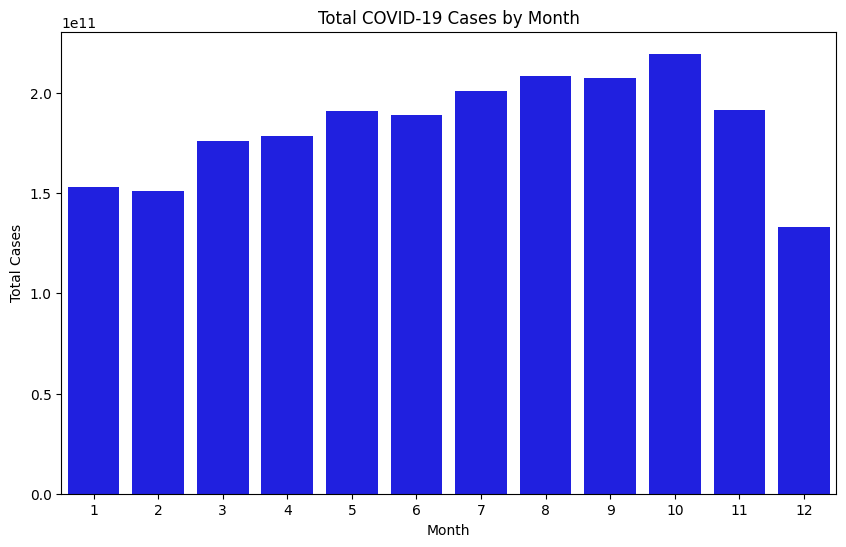

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Grouped Bar Chart for New Cases by Continent and Month
# Convert 'date' column to datetime type
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Extract the month and year
covid_df['month'] = covid_df['date'].dt.month
covid_df['year'] = covid_df['date'].dt.year

# Group data by continent and month, summing up new cases
continent_month_data = covid_df.groupby(['continent', 'month'])['new_cases'].sum().reset_index()

# Plotting a grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='month', y='new_cases', hue='continent', data=continent_month_data)
plt.title('New COVID-19 Cases by Continent and Month')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend(title='Continent')
plt.show()

#Box Plot for Total COVID-19 Cases by Year
# Group by year to calculate total cases
yearly_data = covid_df.groupby(['year', 'continent'])['total_cases'].sum().reset_index()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='total_cases', data=yearly_data)
plt.title('Distribution of Total COVID-19 Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

#Bar Plot Comparing Total Deaths Across Continents
# Group by continent to sum total deaths
continent_deaths = covid_df.groupby('continent')['total_deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='total_deaths', data=continent_deaths, color='red')
plt.title('Total COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.show()

#Bar Plot for Total Cases on a Month-by-Month Basis
# Group by month to calculate total cases
monthly_cases = covid_df.groupby('month')['total_cases'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=monthly_cases, color='blue')
plt.title('Total COVID-19 Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()


Activity 5: Time Series Analysis
Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring
testing metrics for a comprehensive global overview.
1. Explore the daily trend of new cases and new deaths globally using line plots.
2. Calculate and visualise the daily average of new cases and deaths globally.
3. Explore the trend of vaccination coverage over time globally.
4. Analyze the total tests and positive rate over time globally.

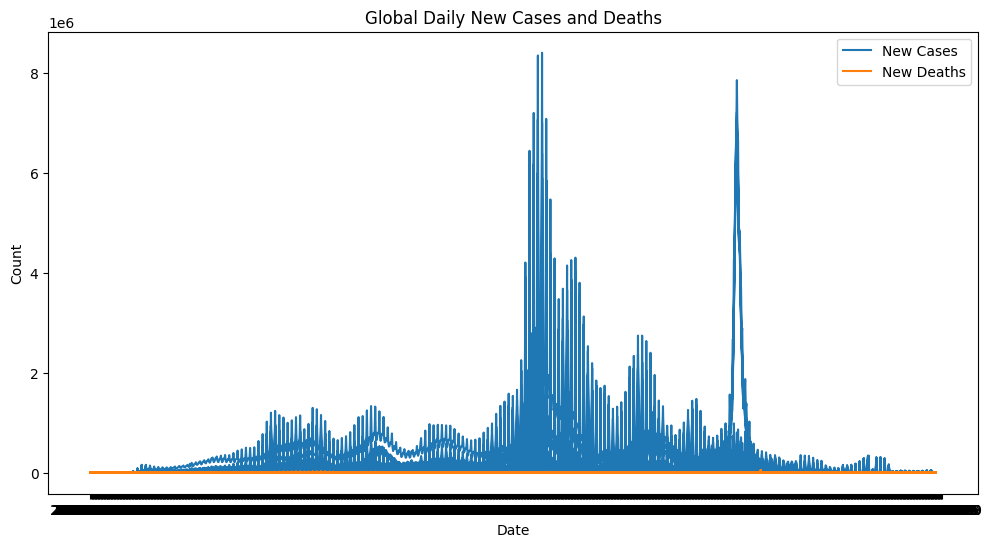

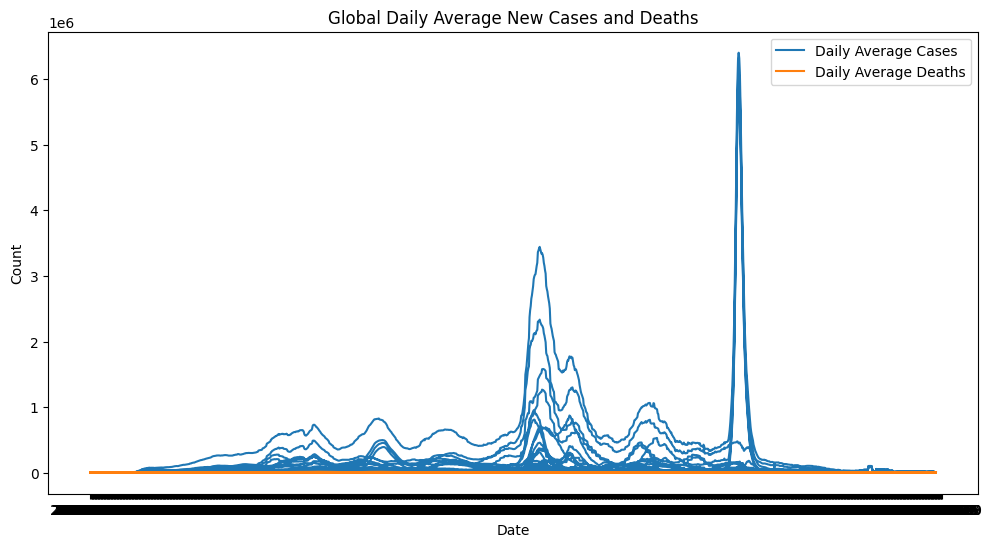

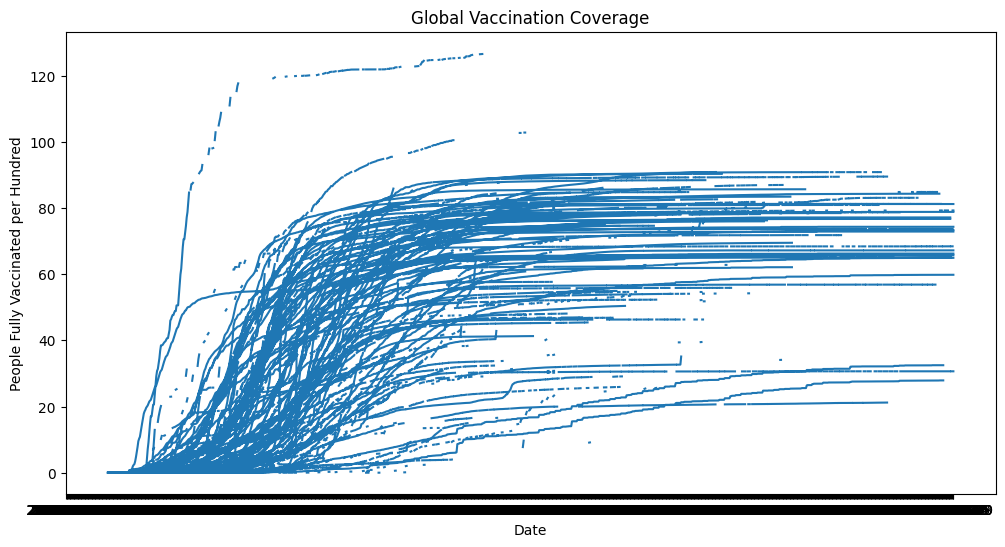

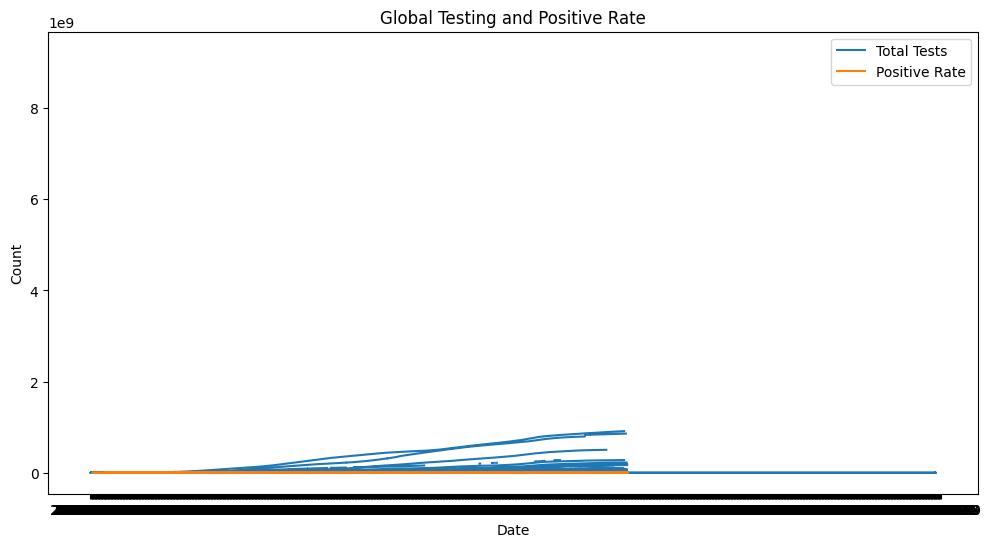

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the COVID-19 dataset
covid_df = pd.read_csv("/content/owid-covid-data.csv")

# 1. Explore the daily trend of new cases and deaths globally
plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['new_cases'], label='New Cases')
plt.plot(covid_df['date'], covid_df['new_deaths'], label='New Deaths')
plt.title('Global Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2. Calculate and visualize the daily average of new cases and deaths globally
covid_df['daily_avg_cases'] = covid_df['new_cases'].rolling(window=7).mean()
covid_df['daily_avg_deaths'] = covid_df['new_deaths'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['daily_avg_cases'], label='Daily Average Cases')
plt.plot(covid_df['date'], covid_df['daily_avg_deaths'], label='Daily Average Deaths')
plt.title('Global Daily Average New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# 3. Explore the trend of vaccination coverage over time globally
plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['people_fully_vaccinated_per_hundred'])
plt.title('Global Vaccination Coverage')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated per Hundred')
plt.show()

# 4. Analyze the total tests and positive rate over time globally
plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['total_tests'], label='Total Tests')
plt.plot(covid_df['date'], covid_df['positive_rate'], label='Positive Rate')
plt.title('Global Testing and Positive Rate')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

Activity 6: In-Depth Country Analysis
Conducting an in-depth examination of specific countries, understanding the correlation
between cases and deaths globally, and exploring continental variations in case distribution.
1. Visualize a specific country's total COVID-19 cases and deaths over time.
2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart
for the user-selected values.
3. Analyze the distribution of total cases across different continents using a box plot.
4. Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country.

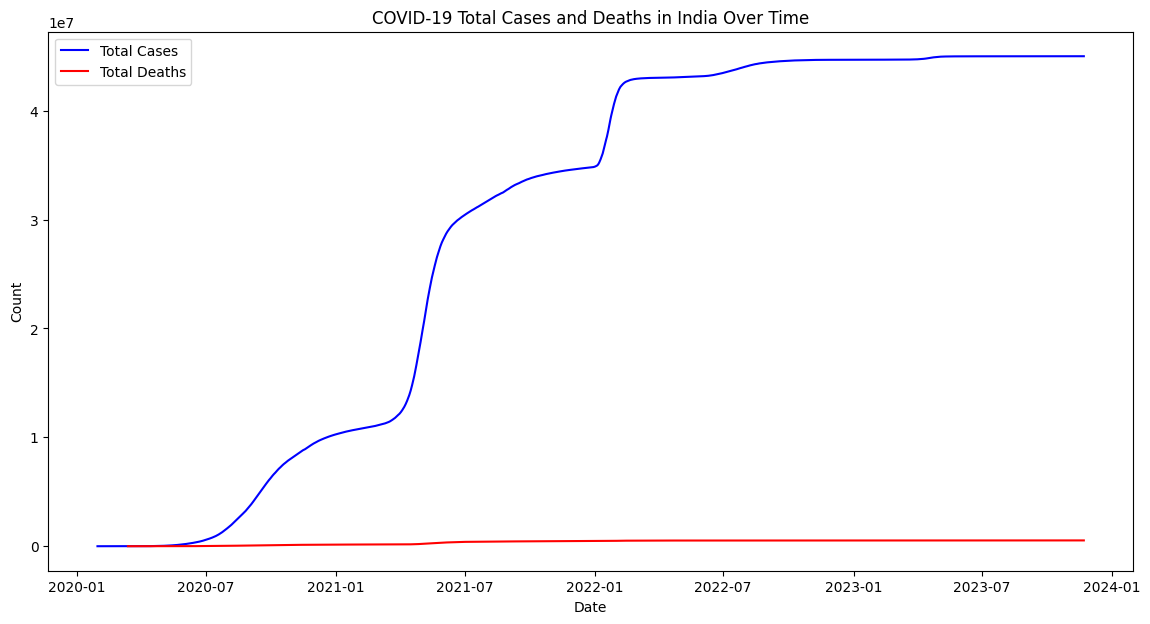

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize a Specific Country's Total Cases and Deaths Over Time
# Filter data for a specific country (e.g., India)
country = 'India'
country_data = covid_df[covid_df['location'] == country]

# Plot total cases and deaths over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_cases', data=country_data, label='Total Cases', color='blue')
sns.lineplot(x='date', y='total_deaths', data=country_data, label='Total Deaths', color='red')
plt.title(f'COVID-19 Total Cases and Deaths in {country} Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()






Enter the country name: India
Enter the metric (total_cases or total_deaths): total_cases


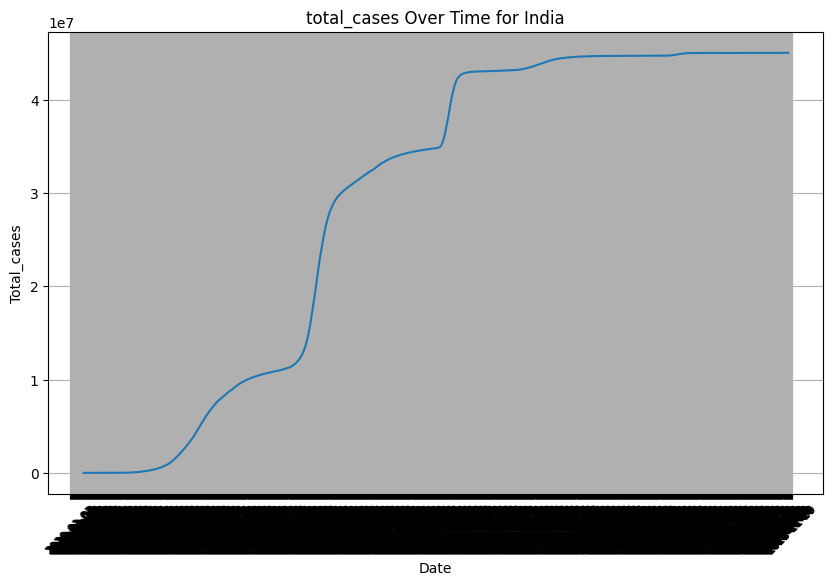

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the COVID-19 dataset
covid_df = pd.read_csv("/content/owid-covid-data.csv")


#Get user input for the country and metric (total_cases or total_deaths)
# Get user input for country and metric
while True:
    country = input("Enter the country name: ")
    if country not in covid_df['location'].unique():
        print("Invalid country name. Please try again.")
    else:
        break

while True:
    metric = input("Enter the metric (total_cases or total_deaths): ")
    if metric not in ['total_cases', 'total_deaths']:
        print("Invalid metric. Please enter 'total_cases' or 'total_deaths'.")
    else:
        break

# Filter data for the selected country
country_data = covid_df[covid_df['location'] == country]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(country_data['date'], country_data[metric])
plt.title(f"{metric} Over Time for {country}")
plt.xlabel('Date')
plt.ylabel(metric.capitalize())
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()

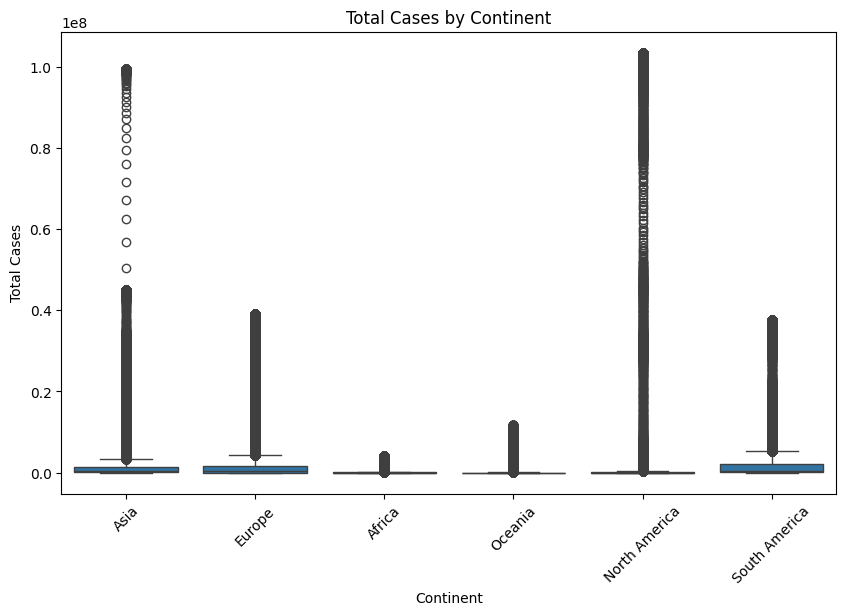

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Analyze the distribution of total cases across different continents
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='total_cases', data=covid_df)
plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

Enter the country for monthly trend analysis: India


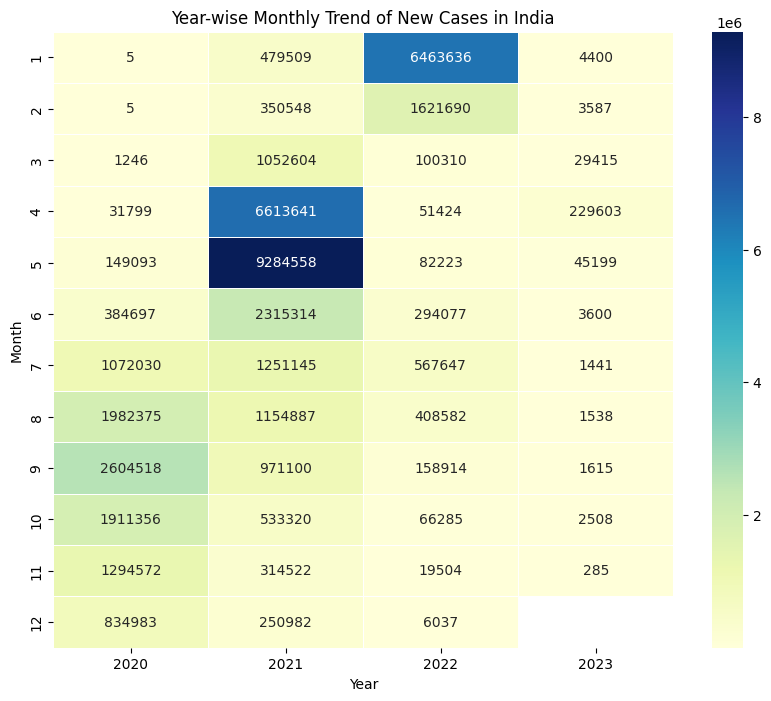

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country.
# Prompt user for a country
trend_country = input("Enter the country for monthly trend analysis: ")

# Filter data for the selected country
trend_country_data = covid_df[covid_df['location'] == trend_country].copy()  # Make a copy to avoid the warning

# Convert 'date' column to datetime, handling errors and coercing invalid formats to NaT
try:
  trend_country_data['date'] = pd.to_datetime(trend_country_data['date'])
except pd.errors.ParserError:
  print("Warning: Encountered errors while parsing dates. Invalid formats will be set to NaT (Not a Time).")
  trend_country_data['date'] = pd.to_datetime(trend_country_data['date'], errors='coerce')

# Check if there are any rows where date conversion failed
if trend_country_data['date'].isnull().any():
  print("Warning: Some date values could not be converted and are set to NaT.")
  trend_country_data = trend_country_data.dropna(subset=['date'])

# Extract month and year from the datetime column (assuming 'date' is now datetime)
trend_country_data['month'] = trend_country_data['date'].dt.month
trend_country_data['year'] = trend_country_data['date'].dt.year

# Group by year and month, summing new cases
monthly_trend = trend_country_data.groupby(['year', 'month'])['new_cases'].sum().reset_index()

# Pivot for visualization
monthly_trend_pivot = monthly_trend.pivot(index='month', columns='year', values='new_cases')

# Heatmap for monthly trend
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_trend_pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title(f'Year-wise Monthly Trend of New Cases in {trend_country}')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()





Activity 7: Additional Insights
Extracting additional insights, examining the influence of external factors, and evaluating
regional disparities for a holistic understanding of the COVID-19 landscape.
1. Visualize the fatality rate (total deaths / total cases) over time globally.
2. Explore the positivity rate (total_cases/ total tests) versus total tests conducted to analyse
testing effectiveness using the x-axis as the logarithmic scale for better visualisation.
3. Analyze the fatality rate and its relationship with smoking (Use male_smokers and
female_smokers columns).
4. Create a heatmap to analyse the relationship between hospital beds per thousand and
fatality rate.


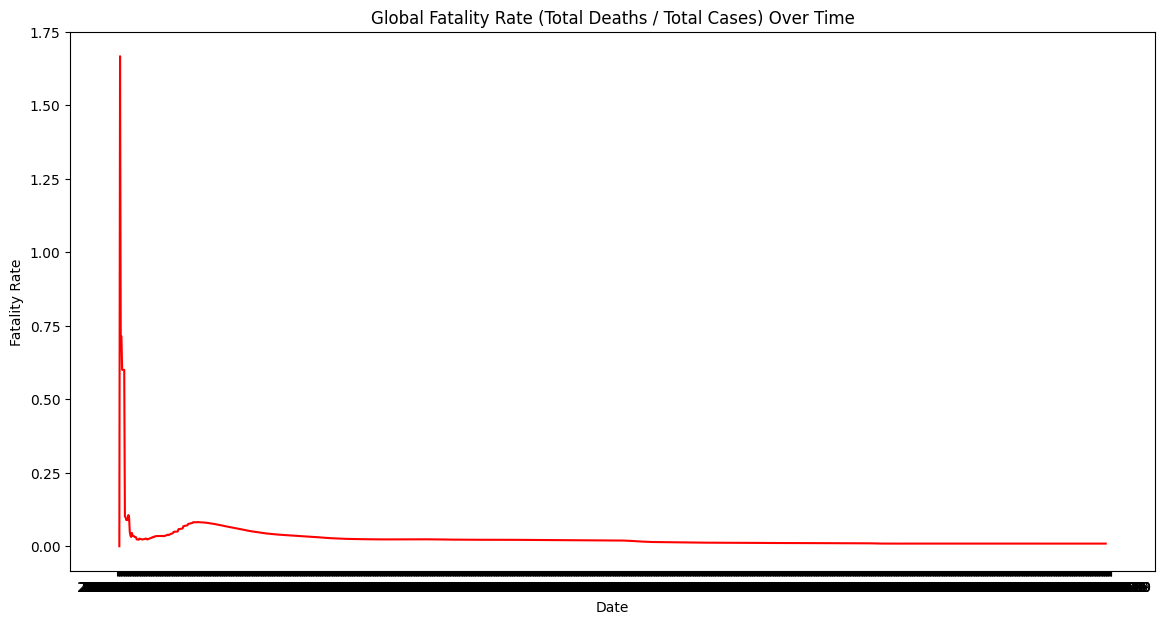

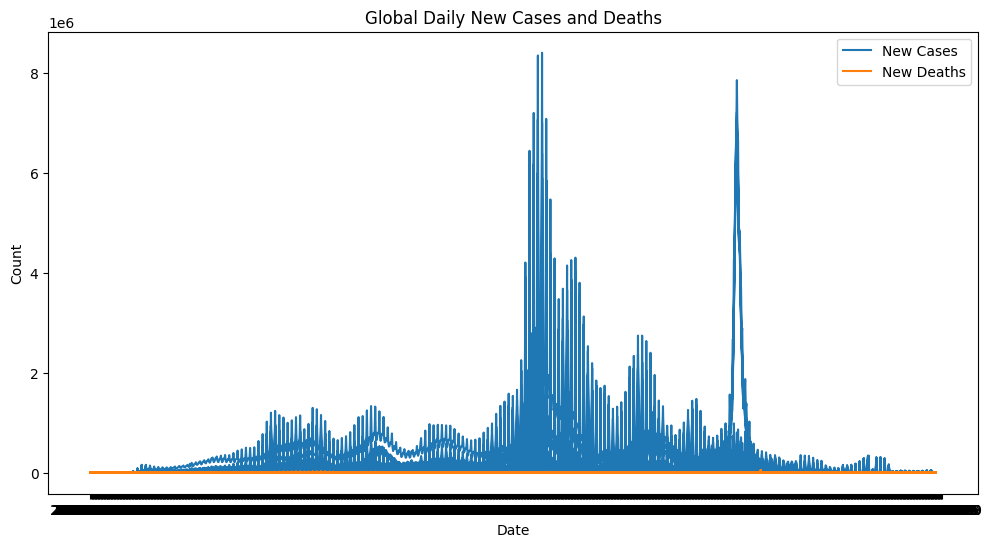

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Fatality Rate (Total Deaths / Total Cases) Over Time Globally

# Group data by date and calculate total cases and total deaths
global_data = covid_df.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()

# Calculate fatality rate (total deaths / total cases)
global_data['fatality_rate'] = global_data['total_deaths'] / global_data['total_cases']

# Plot the fatality rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='fatality_rate', data=global_data, color='red')
plt.title('Global Fatality Rate (Total Deaths / Total Cases) Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate')
plt.show()

# Visualize the daily trend of new cases and deaths globally
plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['new_cases'], label='New Cases')
plt.plot(covid_df['date'], covid_df['new_deaths'], label='New Deaths')
plt.title('Global Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



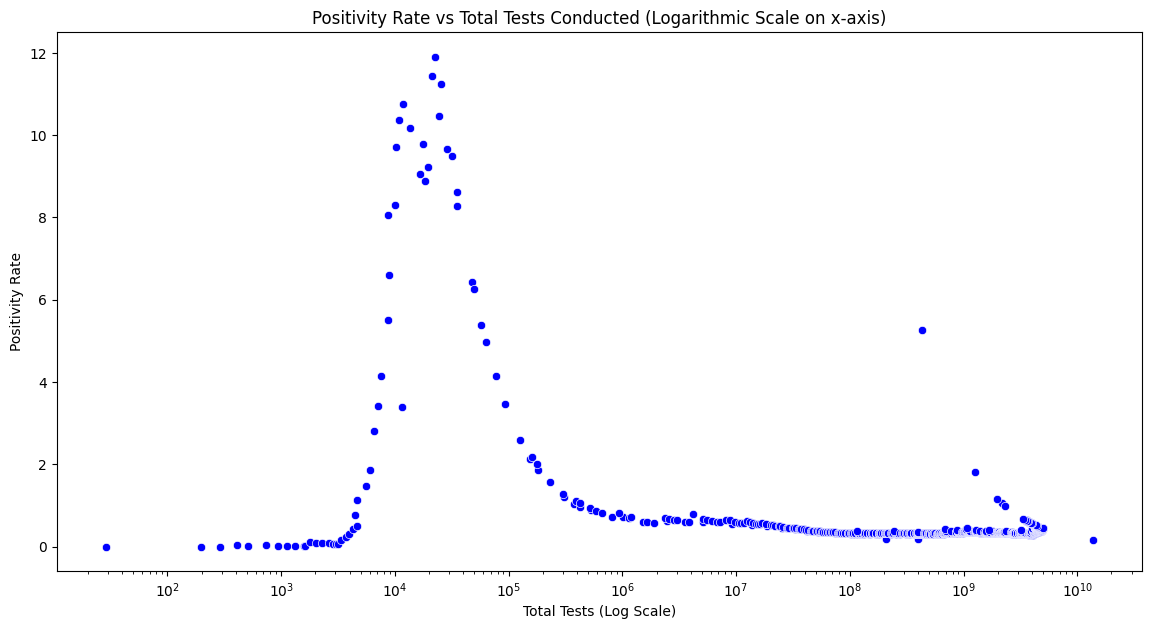

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


# Explore the Positivity Rate (Total Cases / Total Tests) Versus Total Tests Conducted to Analyze Testing Effectiveness Using Logarithmic Scale

# Group data by date and calculate total tests and total cases
global_tests_data = covid_df.groupby('date')[['total_cases', 'total_tests']].sum().reset_index()

# Calculate positivity rate (total cases / total tests)
global_tests_data['positivity_rate'] = global_tests_data['total_cases'] / global_tests_data['total_tests']

# Plot positivity rate versus total tests with a logarithmic scale on x-axis
plt.figure(figsize=(14, 7))
sns.scatterplot(x='total_tests', y='positivity_rate', data=global_tests_data, color='blue')
plt.xscale('log')  # Apply logarithmic scale on x-axis
plt.title('Positivity Rate vs Total Tests Conducted (Logarithmic Scale on x-axis)')
plt.xlabel('Total Tests (Log Scale)')
plt.ylabel('Positivity Rate')
plt.show()


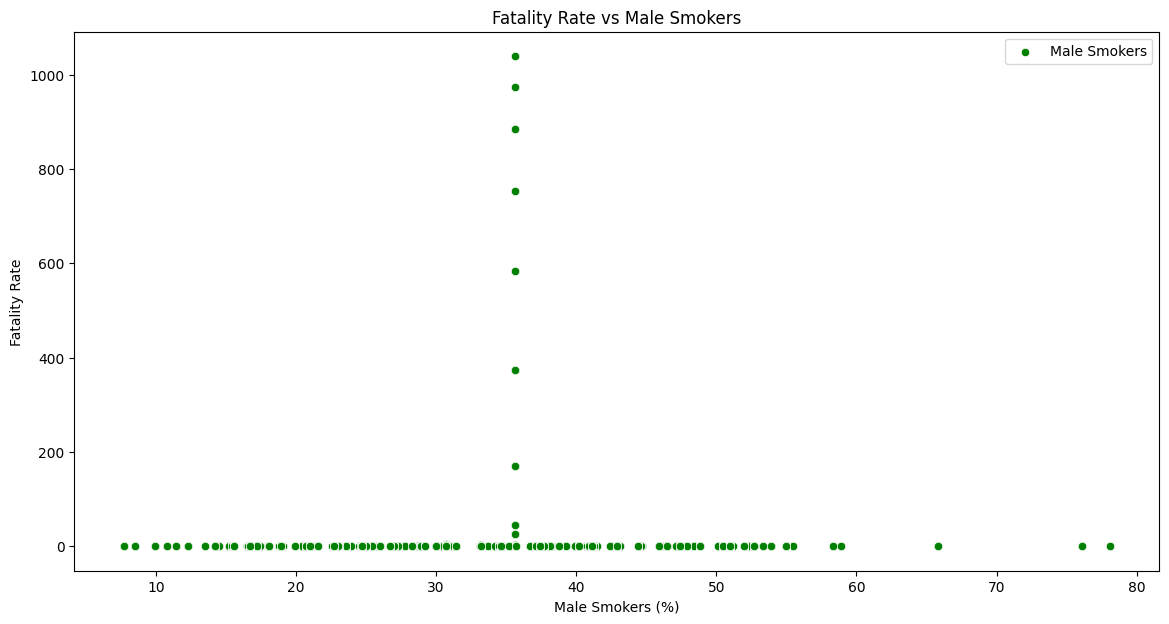

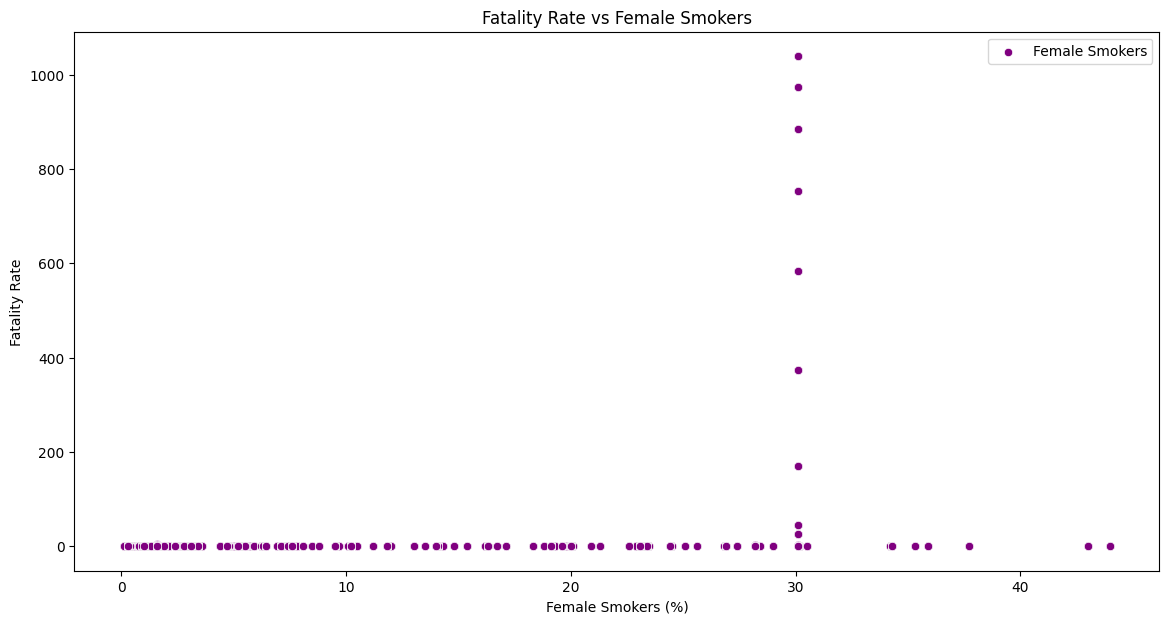

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the Fatality Rate and Its Relationship with Smoking (Use Male Smokers and Female Smokers Columns)

# Ensure the necessary columns (male_smokers and female_smokers) are present
# Calculate the fatality rate globally (total deaths / total cases)
covid_df['fatality_rate'] = covid_df['total_deaths'] / covid_df['total_cases']

# Scatter plot: Fatality Rate vs. Male Smokers
plt.figure(figsize=(14, 7))
sns.scatterplot(x='male_smokers', y='fatality_rate', data=covid_df, color='green', label='Male Smokers')
plt.title('Fatality Rate vs Male Smokers')
plt.xlabel('Male Smokers (%)')
plt.ylabel('Fatality Rate')
plt.legend()
plt.show()

# Scatter plot: Fatality Rate vs. Female Smokers
plt.figure(figsize=(14, 7))
sns.scatterplot(x='female_smokers', y='fatality_rate', data=covid_df, color='purple', label='Female Smokers')
plt.title('Fatality Rate vs Female Smokers')
plt.xlabel('Female Smokers (%)')
plt.ylabel('Fatality Rate')
plt.legend()
plt.show()


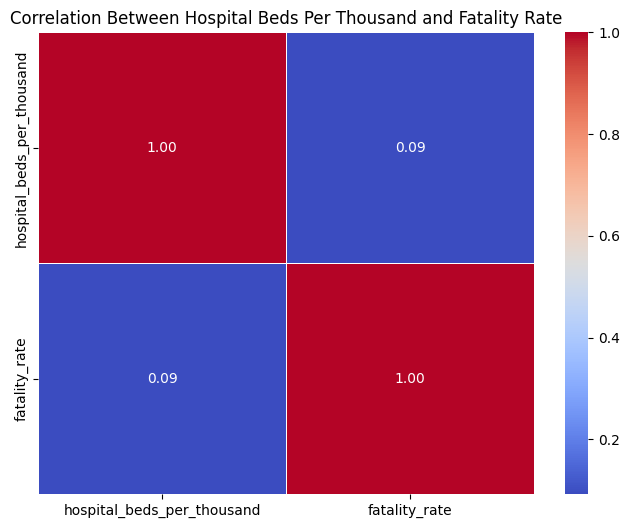

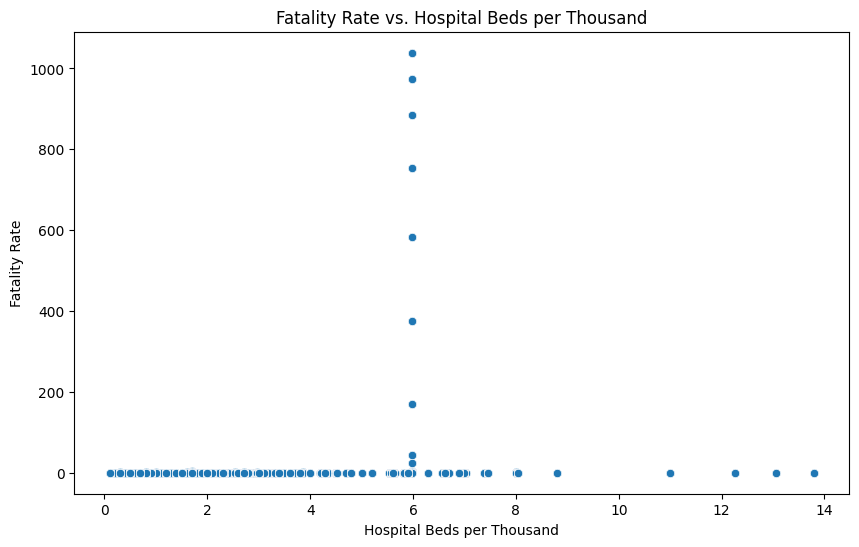

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Heatmap to Analyze the Relationship Between Hospital Beds Per Thousand and Fatality Rate

# Ensure columns 'hospital_beds_per_thousand' and 'fatality_rate' are available
# We may need to group by country and take the mean for analysis
country_data = covid_df.groupby('location')[['hospital_beds_per_thousand', 'fatality_rate']].mean().reset_index()

# Create a correlation matrix
corr_matrix = country_data[['hospital_beds_per_thousand', 'fatality_rate']].corr()

# Heatmap for the correlation between hospital beds per thousand and fatality rate
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Hospital Beds Per Thousand and Fatality Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hospital_beds_per_thousand', y='fatality_rate', data=covid_df)
plt.title('Fatality Rate vs. Hospital Beds per Thousand')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Fatality Rate')
plt.show()
